In [ ]:
Calculate the number of days / years data we have in test and train data sets
Tip Trading floors work 250 days
Calculate the number of trades (rows in test data) for each day - display in a plot or table
Calaulate the max and min number of trades done for the whole period and what days they occured on

In [ ]:
Average number of resp per day
disrtibution of values
pair plots
plot correlation of 'resp_1', 'resp_2', 'resp_3', 'resp_4','resp']]

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
train = pd.read_csv("train.csv")
submission = pd.read_csv("example_sample_submission.csv")       
features = pd.read_csv("features.csv")       
examples = pd.read_csv("example_test.csv")

In [6]:
train.head(5)

,date,weight,resp_1,resp_2,resp_3,resp_4,resp,feature_0,feature_1,feature_2,...,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,ts_id
0,0,0.000000,0.009916,0.014079,0.008773,0.001390,0.006270,1,-1.872746,-2.191242,...,NaN,1.168391,8.313583,1.782433,14.018213,2.653056,12.600292,2.301488,11.445807,0
1,0,16.673515,-0.002828,-0.003226,-0.007319,-0.011114,-0.009792,-1,-1.349537,-1.704709,...,NaN,-1.178850,1.777472,-0.915458,2.831612,-1.417010,2.297459,-1.304614,1.898684,1
2,0,0.000000,0.025134,0.027607,0.033406,0.034380,0.023970,-1,0.812780,-0.256156,...,NaN,6.115747,9.667908,5.542871,11.671595,7.281757,10.060014,6.638248,9.427299,2
3,0,0.000000,-0.004730,-0.003273,-0.000461,-0.000476,-0.003200,-1,1.174378,0.344640,...,NaN,2.838853,0.499251,3.033732,1.513488,4.397532,1.266037,3.856384,1.013469,3
4,0,0.138531,0.001252,0.002165,-0.001215,-0.006219,-0.002604,1,-3.172026,-3.093182,...,NaN,0.344850,4.101145,0.614252,6.623456,0.800129,5.233243,0.362636,3.926633,4


In [7]:
features.head(5)

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,...,tag_19,tag_20,tag_21,tag_22,tag_23,tag_24,tag_25,tag_26,tag_27,tag_28
0,feature_0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,feature_1,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
2,feature_2,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3,feature_3,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,feature_4,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [8]:
Col = train['weight']
Col.head(10)

0     0.000000
1    16.673515
2     0.000000
3     0.000000
4     0.138531
5     0.000000
6     0.190575
7     3.820844
8     0.116557
9     0.160117
Name: weight, dtype: float64

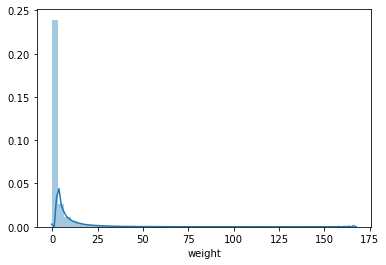

In [9]:
sns.distplot(Col)

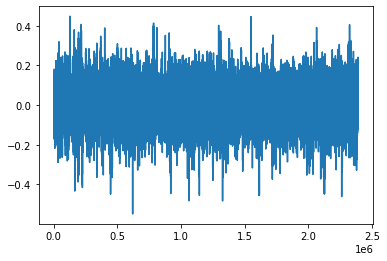

In [10]:
plt.plot(train['resp'])

[]

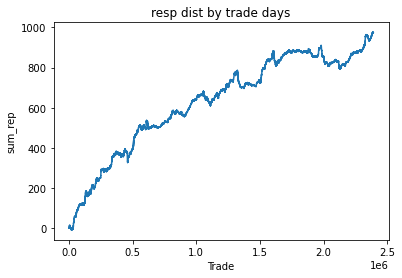

In [11]:
plt.plot(train['resp'].cumsum())
plt.xlabel('Trade')
plt.ylabel('sum_rep')
plt.title('resp dist by trade days')
plt.plot()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

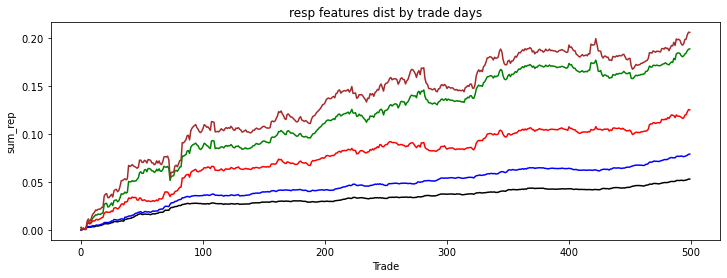

In [12]:
plt.figure(figsize=(12,4))
plt.plot((train.groupby('date')['resp'].mean()).cumsum(),'green')
plt.plot((train.groupby('date')['resp_1'].mean()).cumsum(),'black')
plt.plot((train.groupby('date')['resp_2'].mean()).cumsum(),'blue')
plt.plot((train.groupby('date')['resp_3'].mean()).cumsum(),'red')
plt.plot((train.groupby('date')['resp_4'].mean()).cumsum(),'brown')
plt.xlabel('Trade')
plt.ylabel('sum_rep')
plt.title('resp features dist by trade days')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

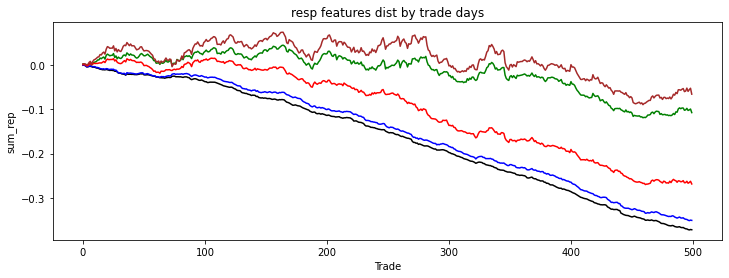

In [13]:
#Each trade have asssociated weight and resp,when sum together gives a return on trade.
train['return_resp']= train['weight']*train['resp']
train['return_resp1']= train['weight']*train['resp_1']
train['return_resp2']= train['weight']*train['resp_2']
train['return_resp3']= train['weight']*train['resp_3']
train['return_resp4']= train['weight']*train['resp_4']

plt.figure(figsize=(12,4))
plt.plot((train.groupby('date')['return_resp'].mean()).cumsum(),'green')
plt.plot((train.groupby('date')['return_resp1'].mean()).cumsum(),'black')
plt.plot((train.groupby('date')['return_resp2'].mean()).cumsum(),'blue')
plt.plot((train.groupby('date')['return_resp3'].mean()).cumsum(),'red')
plt.plot((train.groupby('date')['return_resp4'].mean()).cumsum(),'brown')
plt.xlabel('Trade')
plt.ylabel('sum_rep')
plt.title('resp features dist by trade days')
plt.plot

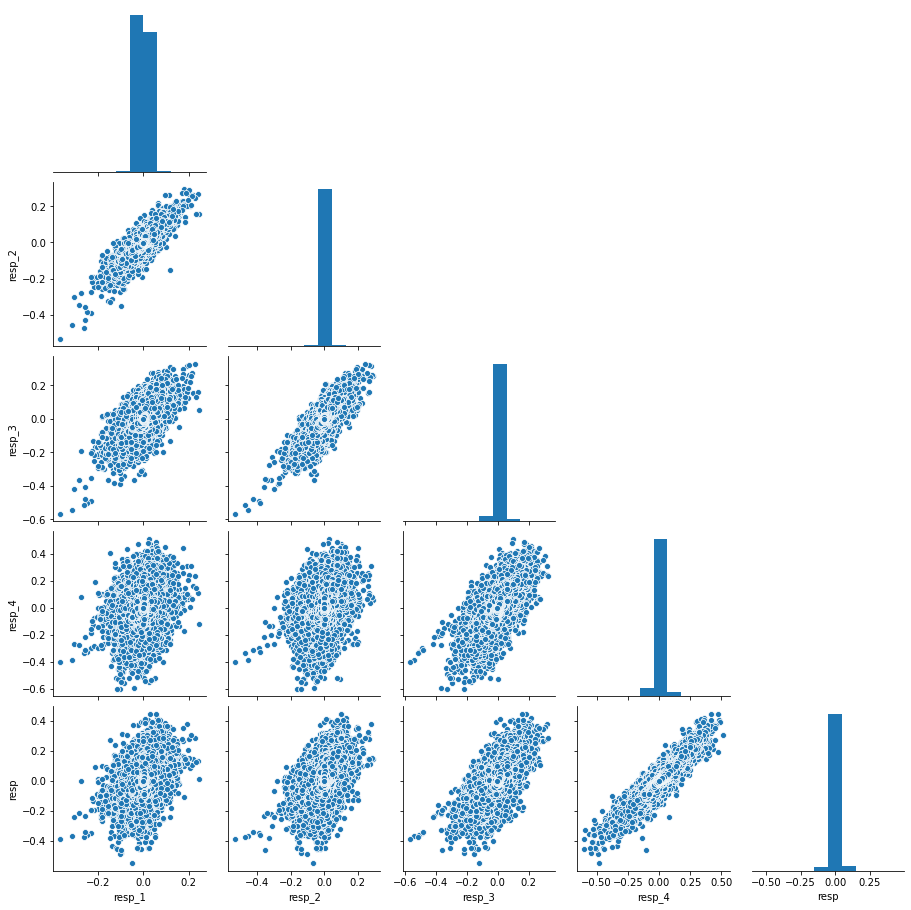

In [14]:
sns.pairplot(train[['resp_1', 'resp_2', 'resp_3', 'resp_4', 'resp']],corner=True)

In [15]:
train[['resp','resp_1','resp_2','resp_3','resp_4']].corr().style.background_gradient(cmap='coolwarm')

,resp,resp_1,resp_2,resp_3,resp_4
resp,1.000000,0.452159,0.595274,0.815972,0.956197
resp_1,0.452159,1.000000,0.890214,0.678381,0.358949
resp_2,0.595274,0.890214,1.000000,0.823383,0.469230
resp_3,0.815972,0.678381,0.823383,1.000000,0.805952
resp_4,0.956197,0.358949,0.469230,0.805952,1.000000


In [ ]:
#Date Analysis

In [16]:
train.date.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
#The Date seem to contain 2 years of trading data since the trading days are is appro a full year

In [17]:
#Calaulate the max and min number of trades done for the whole period
number_of_trade = train.groupby('date').agg({'ts_id': ['min', 'max']})

In [19]:
number_of_trade

ts_id         
          min      max
date                  
0           0     5586
1        5587    14987
2       14988    15218
3       15219    22439
4       22440    32744
...       ...      ...
495   2363830  2372080
496   2372081  2376362
497   2376363  2380365
498   2380366  2384851
499   2384852  2390490

[500 rows x 2 columns]

In [20]:
trade_day= train.groupby('date')['ts_id'].count()

In [21]:
trade_day

date
0       5587
1       9401
2        231
3       7221
4      10305
       ...  
495     8251
496     4282
497     4003
498     4486
499     5639
Name: ts_id, Length: 500, dtype: int64

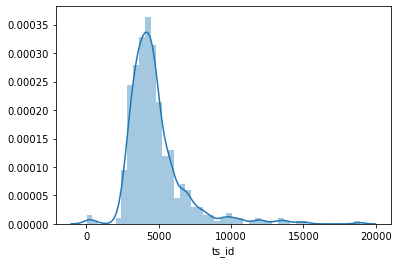

In [22]:
sns.distplot(trade_day)

[]

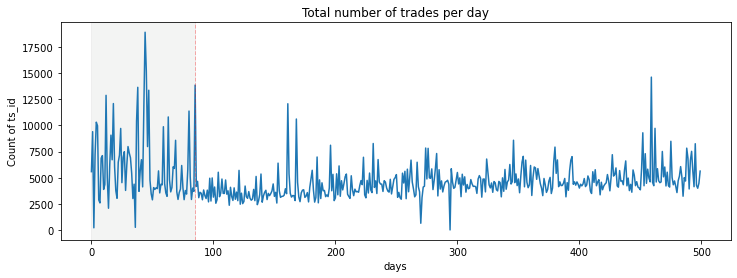

In [23]:
plt.figure(figsize=(12,4))
plt.plot(trade_day)
plt.title("Total number of trades per day")
plt.xlabel("days")
plt.ylabel("Count of ts_id")
plt.axvline(x=85, linestyle='--', alpha=0.3, c='red', lw=1)
plt.axvspan(0,85 , color=sns.xkcd_rgb['grey'], alpha=0.1)
plt.plot()

(0.0, 5000.0)

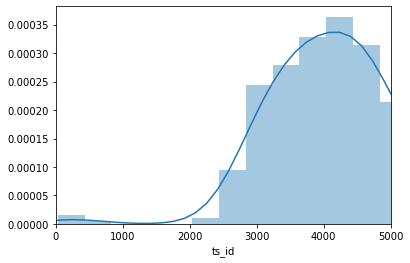

In [24]:
sns.distplot(trade_day)
plt.xlim(0,5000)

(5000.0, 15000.0)

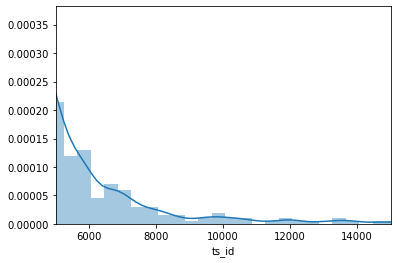

In [25]:
#it can be observe that heavy amount of trades  per day range from 2500 - 9000

sns.distplot(trade_day)
plt.xlim(5000,15000)